In [144]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
DATA_PATH = '../../../input_data/synthetic_examples/input_data/Test1/'

In [146]:
OUTPUT_PATH = '../../../output_data/validation/'

In [147]:
SOT_PATH = OUTPUT_PATH + 'source_of_truth/'

In [148]:
DATA_PATH = '../../../input_data/synthetic_examples/input_data/'

In [149]:
os.listdir(SOT_PATH)

['one_line',
 'Test0a_15min_Direct_QQ.csv',
 'Test0b_15min_Direct_QQ_RT.csv',
 'test1',
 'Test1_040116_15min_Direct_QQ.csv',
 'Test1_040116_30min_Direct_QQ.csv',
 'Test1_040116_60min_Direct_QQ (2).csv',
 'Test1_040116_90min_Direct_QQ.csv',
 'test2',
 'Test2_091215_15min_Direct_QQ.csv',
 'Test2_091215_30min_Direct_QQ.csv',
 'Test2_091215_45min_Direct_QQ.csv',
 'Test2_091215_60min_Direct_QQ.csv',
 'Test2_091215_90min_Direct_QQ.csv',
 'Test3_040116_15min_Direct_QQ.csv',
 'Test3_040116_30min_Direct_QQ.csv',
 'Test3_040116_45min_Direct_QQ.csv',
 'Test3_040116_60min_Direct_QQ.csv',
 'Test3_040116_90min_Direct_QQ.csv',
 'TestParameters_Statistics.xlsx',
 'two_lines']

## Validate Test 1

In [150]:
os.listdir(OUTPUT_PATH + 'test1/')

['aa_1-601.pkl',
 'aa_1-661.pkl',
 'all_nodes.pkl',
 'morning_direct_edges.pkl',
 'morning_nodes.pkl',
 'morning_start_nodes.pkl',
 'morning_transfer_edges.pkl',
 'nearby_stops.csv',
 'nearby_stops.pkl',
 'original_date_according_to_input',
 'problematic.csv',
 'problematic_trips.png',
 'problematic_trips2.png',
 'sa_1-601.pkl',
 'stops.csv']

In [185]:
aa1_df = pd.read_pickle(OUTPUT_PATH + 'test1/aa_1-1134.pkl')

In [186]:
aa1_df.shape

(1583, 9)

In [187]:
sot_1_df = pd.read_csv(SOT_PATH + 'test1/Test1_040116_60min_Direct_QQ.csv')
sot_1_min_df = sot_1_df.loc[sot_1_df.groupby(['ID STOP START', 'ID STOP DEST'])['TRAVEL TIME'].idxmin()]
t1_df = aa1_df.merge(sot_1_min_df, left_on=['stop_id_source', 'stop_id_target'], right_on=['ID STOP START', 'ID STOP DEST'])
t1_df['diff'] = t1_df['time_sec'] - t1_df['TRAVEL TIME']

In [188]:
t1_df.shape

(1579, 15)

In [189]:
t1_prob_df = t1_df[t1_df['diff'] != 0]

In [190]:
t1_prob_df.shape

(191, 15)

In [191]:
t1_prob_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
64,12962,12834,1719.0,34.784677,32.084755,2016-01-04 07:52:45,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12834,07:47:45,1419,300.0
65,12962,12841,1659.0,34.787875,32.084074,2016-01-04 07:51:45,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12841,07:46:45,1359,300.0
66,12962,12889,1484.0,34.795442,32.082455,2016-01-04 07:48:50,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12889,07:43:50,1184,300.0
68,12962,12894,1821.0,34.778794,32.086040,2016-01-04 07:54:27,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12894,07:49:27,1521,300.0
83,12962,13296,2504.0,34.772032,32.065619,2016-01-04 08:05:50,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,13296,08:00:50,2204,300.0


(array([1388.,    0.,   11.,    0.,   45.,    0.,    0.,    0.,   45.,
          90.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

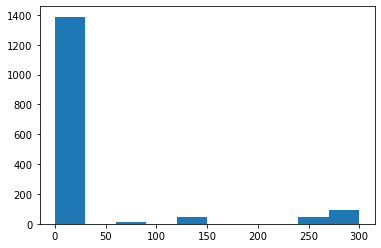

In [192]:
plt.hist(t1_df['diff'])

(array([11.,  0., 45.,  0.,  0.,  0.,  0., 45.,  0., 90.]),
 array([ 60.,  84., 108., 132., 156., 180., 204., 228., 252., 276., 300.]),
 <a list of 10 Patch objects>)

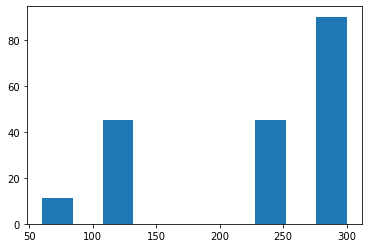

In [193]:
plt.hist(t1_prob_df['diff'])

In [194]:
t1_prob_df.shape

(191, 15)

In [195]:
t1_prob_df.nunique()

stop_id_source      13
stop_id_target      26
time_sec           184
stop_lon_target     26
stop_lat_target     26
arrival_target      56
stop_lon_source     13
stop_lat_source     13
departure           13
ID STOP START       13
TIME DEPART         12
ID STOP DEST        26
TIME ARRIVAL        56
TRAVEL TIME        183
diff                 4
dtype: int64

In [196]:
t1_prob_df.head(1)

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
64,12962,12834,1719.0,34.784677,32.084755,2016-01-04 07:52:45,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12834,07:47:45,1419,300.0


In [197]:
t1_prob_df.columns

Index(['stop_id_source', 'stop_id_target', 'time_sec', 'stop_lon_target',
       'stop_lat_target', 'arrival_target', 'stop_lon_source',
       'stop_lat_source', 'departure', 'ID STOP START', 'TIME DEPART',
       'ID STOP DEST', 'TIME ARRIVAL', 'TRAVEL TIME', 'diff'],
      dtype='object')

In [232]:
sorted_prob_df = t1_prob_df.sort_values(by='TRAVEL TIME')

In [233]:
sorted_prob_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
1096,14347,12889,1183.0,34.795442,32.082455,2016-01-04 07:48:50,34.838874,32.092796,2016-01-04 07:29:07,14347,07:29:07,12889,07:43:50,883,300.0
217,13120,12889,1020.0,34.795442,32.082455,2016-01-04 07:40:50,34.824478,32.091293,2016-01-04 07:23:50,13120,07:25:50,12889,07:40:50,900,120.0
1121,14347,13725,1246.0,34.792847,32.083022,2016-01-04 07:49:53,34.838874,32.092796,2016-01-04 07:29:07,14347,07:29:07,13725,07:44:53,946,300.0
143,13032,12889,1077.0,34.795442,32.082455,2016-01-04 07:40:50,34.828052,32.091762,2016-01-04 07:22:53,13032,07:24:53,12889,07:40:50,957,120.0
240,13120,13725,1083.0,34.792847,32.083022,2016-01-04 07:41:53,34.824478,32.091293,2016-01-04 07:23:50,13120,07:25:50,13725,07:41:53,963,120.0


In [199]:
t1_prob_df.to_csv(OUTPUT_PATH + 'test1/problematic.csv')

In [200]:
stops_df = pd.read_csv(DATA_PATH + 'test1/stops.txt')

In [201]:
stops_df.head(1)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station
0,12834,21038,הועד הפועל/ארלוזורוב,רחוב:ארלוזורוב 93 עיר: תל אביב יפו רציף: קו...,32.084755,34.784677,0,NaN


In [202]:
stops_df.to_csv(OUTPUT_PATH + 'test1/stops.csv')

In [203]:
t1_prob_df['diff'].unique()

array([300., 120.,  60., 240.])

In [204]:
DATA_PATH

'../../../input_data/synthetic_examples/input_data/'

In [205]:
stop_times_df = pd.read_csv(DATA_PATH + 'test1/stop_times.txt')

In [206]:
calendar_df = pd.read_csv(DATA_PATH + 'test1/calendar.txt')

## Exploring the first trip with diff (the one with the shortest travel time) 

In [219]:
calendar_df[calendar_df['service_id'] == 31360274]

,service_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,start_date,end_date
15,31360274,0,0,0,0,0,1,0,20151216,20160204


In [220]:
calendar_df[calendar_df['service_id'] == 31360269]

,service_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,start_date,end_date
10,31360269,0,0,0,0,0,1,0,20151209,20151214


In [214]:
trips_df = pd.read_csv(DATA_PATH + 'test1/trips.txt')

We are checking the `stop_times.txt` for trips that have an arrival time of '07:43:50'. There are 2 trips: 18673537_161215 and 19405335_091215. 
<br>
According to `trips.txt`, these trips are related to services: 31360274 and 31360269. The first is only active on Fridays and 04/01/2016 is a Monday. The second is only active between the dates 09/12/15 - 14/12/15.

In [217]:
trips_df[trips_df['trip_id'] == '18673537_161215']  
# Service ID is 31360274 This one should be active on the 04/01/16
# BUT - this service ID is only

,route_id,service_id,trip_id,direction_id,shape_id
370,9807,31360274,18673537_161215,1,64069


In [218]:
trips_df[trips_df['trip_id'] == '19405335_091215']

,route_id,service_id,trip_id,direction_id,shape_id
776,9807,31360269,19405335_091215,1,64069


In [208]:
stop_times_df[stop_times_df['stop_id'] == 14347][stop_times_df['departure_time'] == '07:29:07']

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
1715,19407598_081215,07:29:07,07:29:07,14347,9,0,0
11724,19285957_061215,07:29:07,07:29:07,14347,9,0,0
13052,19285957_151215,07:29:07,07:29:07,14347,9,0,0


In [209]:
stop_times_df[stop_times_df['stop_id'] == 12889][stop_times_df['departure_time'] == '07:43:50']

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
5577,18673537_161215,07:43:50,07:43:50,12889,23,0,0
33497,19405335_091215,07:43:50,07:43:50,12889,23,0,0


In [210]:
nodes_df = pd.read_pickle(OUTPUT_PATH + 'test1/morning_nodes.pkl')

In [211]:
nodes_df[nodes_df['departure_time_stop'] == '07:29:07']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
130,602,19285957_151215,07:29:07,07:29:07,14347,9,2544,07:17:00,27059,32.092796,34.838874,2016-01-04 07:29:07,2016-01-04 07:29:07,130


In [212]:
nodes_df[nodes_df['departure_time_stop'] == '07:43:50']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id


In [182]:
transfers = pd.read_pickle(OUTPUT_PATH + 'test1/morning_transfer_edges.pkl')

## Exploring the second trip with diff (the one with the second shortest travel time) 

First let's check if these nodes exists in `nodes_df`.
The start stop is 13120 and the dest stop is 12889.

In [237]:
nodes_df[nodes_df['departure_time_stop'] == '07:25:50']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
756,3235,18673590_161215,07:25:50,07:25:50,13296,35,9807,06:44:00,22988,32.065619,34.772032,2016-01-04 07:25:50,2016-01-04 07:25:50,756
972,4187,18673594_161215,07:25:50,07:25:50,33862,10,9807,07:16:00,20826,32.085801,34.835141,2016-01-04 07:25:50,2016-01-04 07:25:50,972


In [223]:
nodes_df[nodes_df['departure_time_stop'] == '07:40:50']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
531,2291,18673594_161215,07:40:50,07:40:50,12889,23,9807,07:16:00,21139,32.082455,34.795442,2016-01-04 07:40:50,2016-01-04 07:40:50,531


The start stop doesn't appear with the correct time.

In [224]:
stop_times_df[stop_times_df['stop_id'] == 13120][stop_times_df['departure_time'] == '07:25:50']

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
1375,19286311_151215,07:25:50,07:25:50,13120,12,0,0
16383,19407937_081215,07:25:50,07:25:50,13120,12,0,0


We have two services that have this time in the start stop. Let's check them.

In [225]:
trips_df[trips_df['trip_id'] == '19286311_151215']

,route_id,service_id,trip_id,direction_id,shape_id
644,2544,31349660,19286311_151215,1,62838


In [226]:
trips_df[trips_df['trip_id'] == '19407937_081215']

,route_id,service_id,trip_id,direction_id,shape_id
467,2544,31349670,19407937_081215,1,62838


In [229]:
calendar_df[calendar_df['service_id'] == 31349660]

,service_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,start_date,end_date
2,31349660,0,0,0,0,0,1,0,20151215,20160204


In [228]:
calendar_df[calendar_df['service_id'] == 31349670]

,service_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,start_date,end_date
5,31349670,0,0,0,0,0,1,0,20151208,20151214


The same thing happened again - these services are active on Friday, but 04/01/16 is a Monday.

## We checked diff=300 and diff=120, Now let's check diff=60 

In [236]:
sorted_prob_df[sorted_prob_df['diff'] == 60].sort_values('TRAVEL TIME').head(1)

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
870,14022,38943,1471.0,34.797633,32.081422,2016-01-04 07:40:31,34.838972,32.069215,2016-01-04 07:16:00,14022,07:30:00,38943,07:53:31,1411,60.0


In [238]:
nodes_df[nodes_df['departure_time_stop'] == '07:30:00']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id


In [239]:
stop_times_df[stop_times_df['stop_id'] == 14022][stop_times_df['departure_time'] == '07:30:00']

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
5592,18673538_161215,07:30:00,07:30:00,14022,1,0,1
33512,19405336_091215,07:30:00,07:30:00,14022,1,0,1


In [240]:
trips_df[trips_df['trip_id'] == '18673538_161215']

,route_id,service_id,trip_id,direction_id,shape_id
240,9807,31360274,18673538_161215,1,64069


In [241]:
trips_df[trips_df['trip_id'] == '19405336_091215']

,route_id,service_id,trip_id,direction_id,shape_id
777,9807,31360269,19405336_091215,1,64069


In [242]:
calendar_df[calendar_df['service_id'] == 31360274]

,service_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,start_date,end_date
15,31360274,0,0,0,0,0,1,0,20151216,20160204


In [243]:
calendar_df[calendar_df['service_id'] == 31360269]

,service_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,start_date,end_date
10,31360269,0,0,0,0,0,1,0,20151209,20151214


In [244]:
sorted_prob_df['diff'].unique()

array([300., 120., 240.,  60.])

## Last one to check: diff = 240

In [245]:
sorted_prob_df[sorted_prob_df['diff'] == 240].sort_values('TRAVEL TIME').head(1)

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
1140,15907,12889,1622.0,34.795442,32.082455,2016-01-04 07:56:50,34.84621,32.062576,2016-01-04 07:29:48,15907,07:20:48,12889,07:43:50,1382,240.0


In [246]:
nodes_df[nodes_df['departure_time_stop'] == '07:20:48']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
33,170,19285957_151215,07:20:48,07:20:48,15907,3,2544,07:17:00,31900,32.062576,34.84621,2016-01-04 07:20:48,2016-01-04 07:20:48,33


In [247]:
nodes_df[nodes_df['departure_time_stop'] == '07:43:50']

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id


We already checked this "node" and discovered the line works on Fridays only during these dates (4/1/16) 